In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [3]:
df = pd.read_csv("Philips_Employee_Reviews_from_AmbitionBox.csv")
df = df[df.columns[1:]]
df.head(10)

,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Chennai,Full Time,Software Development Department,4 Sep 2023,1.0,1.0,1.0,3.0,1.0,1.0,2.0,Company culture is terrible please don't join ...,"No process, hectic work load ,one individual m..."
1,Chennai,Full Time,Retail & B2C Sales Department,2 Sep 2023,3.0,3.0,2.0,4.0,2.0,3.0,2.0,Employee benefits & policies,The employee policies are good but the middle ...
2,"Pune, Maharashtra",Full Time,Connected care Department,0 Sep 2023,3.0,4.0,4.0,4.0,3.0,1.0,1.0,Work life balance,"No growth opportunity, work quality is not as ..."
3,"Mumbai, Maharashtra",Full Time,Marketing Department,7 Sep 2023,1.0,2.0,1.0,3.0,3.0,1.0,2.0,"Salary, decent work life balance and benefits",It’s almost a startup culture. Nothing is orga...
4,Chennai,Full Time,Operations Department,3 Sep 2023,5.0,5.0,5.0,5.0,5.0,4.0,5.0,Can get more chance to explore different domai...,What I don't like is people are not moving out...
5,"Gurgaon/Gurugram, Haryana",Full Time,Digital Marketing Department,1 Sep 2023,1.0,3.0,1.0,2.0,1.0,1.0,1.0,Managers gives freedom to work\nHealthy work l...,Highly politicised organisation\nPeople who ca...
6,Bengaluru/Bangalore,Full Time,Software Development Department,0 Aug 2023,1.0,1.0,1.0,2.0,1.0,1.0,1.0,Company brand name,Hostile work culture\nUnprofessional managers ...
7,Bengaluru/Bangalore,Full Time,Software Development Department,5 Aug 2023,4.0,5.0,4.0,4.0,3.0,4.0,4.0,"If the team is good, everything will be good.",There is a team called Connect IOT or IOT or C...
8,Bengaluru/Bangalore,Full Time,Software Development Department,3 Aug 2023,4.0,3.0,5.0,3.0,5.0,4.0,3.0,Philips has lot of employee friendly policies ...,Increase the employee salary as per current ma...
9,Pune,Full Time,Engineering & Manufacturing Department,3 Aug 2023,3.0,3.0,4.0,4.0,3.0,3.0,3.0,Good experience in medical devices design and ...,Like most places your career growth depends on...


In [56]:
## Features Selection:
## In our sentimental analysis task, we will be targeting
## overall_rating, work_life_balance, skill_devlopment, salary_and_benefits, job_secuirty, career_growth, work_satisfaction

Features_select = ['Overall_rating',
       'work_life_balance', 'skill_development', 'salary_and_benefits',
       'job_security', 'career_growth', 'work_satisfaction']

df = df[Features_select]

In [57]:
df

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
0,1.0,1.0,1.0,3.0,1.0,1.0,2.0
1,3.0,3.0,2.0,4.0,2.0,3.0,2.0
2,3.0,4.0,4.0,4.0,3.0,1.0,1.0
3,1.0,2.0,1.0,3.0,3.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...
1291,4.0,3.0,4.0,3.0,4.0,4.0,4.0
1312,4.0,5.0,4.0,4.0,4.0,5.0,4.0
1313,4.0,5.0,4.0,3.0,5.0,5.0,5.0
1316,4.0,3.0,4.0,5.0,5.0,5.0,3.0


In [58]:
df.drop_duplicates(inplace=True)
df

C:\Users\abdul\AppData\Local\Temp\ipykernel_11960\1725291922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
0,1.0,1.0,1.0,3.0,1.0,1.0,2.0
1,3.0,3.0,2.0,4.0,2.0,3.0,2.0
2,3.0,4.0,4.0,4.0,3.0,1.0,1.0
3,1.0,2.0,1.0,3.0,3.0,1.0,2.0
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...
1287,5.0,4.0,3.0,4.0,4.0,5.0,3.0
1288,3.0,4.0,4.0,3.0,3.0,4.0,4.0
1291,4.0,3.0,4.0,3.0,4.0,4.0,4.0
1313,4.0,5.0,4.0,3.0,5.0,5.0,5.0


In [59]:
## filling the nan values with the mode of that specific column
df = df.fillna(df.mode().iloc[0])

In [60]:
df.describe()

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.654843,3.560709,3.448840,3.474761,3.330150,3.472033,3.013643
std,1.199770,1.266718,1.260655,1.116679,1.344948,1.328891,1.267427
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [61]:
'''
The dataset is not containing the targeted column. But we can generate it with out assumption by taking the GM mean of all scores of other attributes.
And then make the threshhold condition to make the positive, neutral and negative classes.
'''

df['target'] = np.exp(np.log(df).mean(axis=1))

In [62]:
df

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,target
0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.291708
1,3.0,3.0,2.0,4.0,2.0,3.0,2.0,2.627253
2,3.0,4.0,4.0,4.0,3.0,1.0,1.0,2.479397
3,1.0,2.0,1.0,3.0,3.0,1.0,2.0,1.668510
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.843125
...,...,...,...,...,...,...,...,...
1287,5.0,4.0,3.0,4.0,4.0,5.0,3.0,3.926918
1288,3.0,4.0,4.0,3.0,3.0,4.0,4.0,3.536021
1291,4.0,3.0,4.0,3.0,4.0,4.0,4.0,3.684370
1313,4.0,5.0,4.0,3.0,5.0,5.0,5.0,4.361027


In [63]:
### defining the threshhold for the class labels from the target column mean values

threshold_low = 3  # Threshold for Negative class
threshold_high = 4  # Threshold for Positive class

# Create the 'classes' column based on threshold conditions
df['classes'] = pd.cut(df['target'], bins=[0, threshold_low, threshold_high, 5],
                       labels=['Negative', 'Neutral', 'Positive'], include_lowest=True)

df.drop(labels=['target'], axis=1, inplace=True)

In [64]:
df

,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,classes
0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,Negative
1,3.0,3.0,2.0,4.0,2.0,3.0,2.0,Negative
2,3.0,4.0,4.0,4.0,3.0,1.0,1.0,Negative
3,1.0,2.0,1.0,3.0,3.0,1.0,2.0,Negative
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,Positive
...,...,...,...,...,...,...,...,...
1287,5.0,4.0,3.0,4.0,4.0,5.0,3.0,Neutral
1288,3.0,4.0,4.0,3.0,3.0,4.0,4.0,Neutral
1291,4.0,3.0,4.0,3.0,4.0,4.0,4.0,Neutral
1313,4.0,5.0,4.0,3.0,5.0,5.0,5.0,Positive


In [65]:
df.classes.value_counts()

Neutral     281
Negative    252
Positive    200
Name: classes, dtype: int64

In [66]:
X = df.drop(labels=['classes'], axis=1)
y = df['classes']

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9659863945578231


In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.98      0.92      0.95        50
     Neutral       0.92      0.98      0.95        49
    Positive       1.00      1.00      1.00        48

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



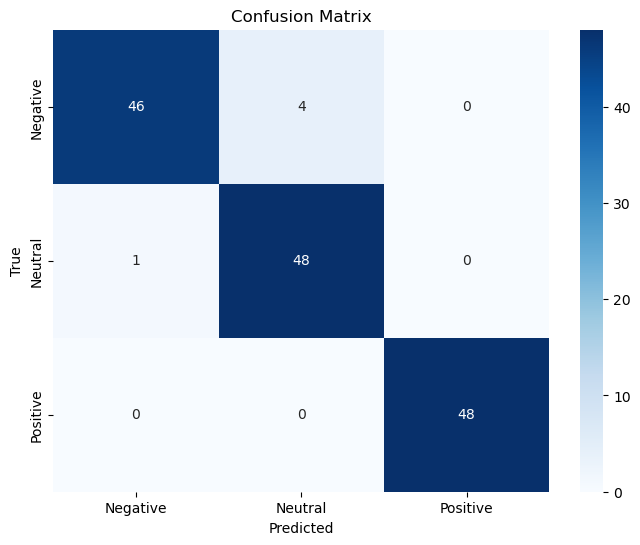

In [72]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [73]:
import pickle

# Save the model to a file using pickle
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
# # Load the model from the file
# with open('svm_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)